In [1]:
#import modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from scipy.ndimage import gaussian_filter

import plotting_functions as plot

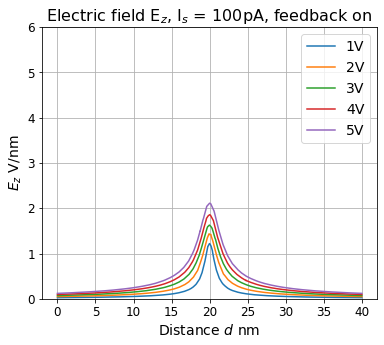

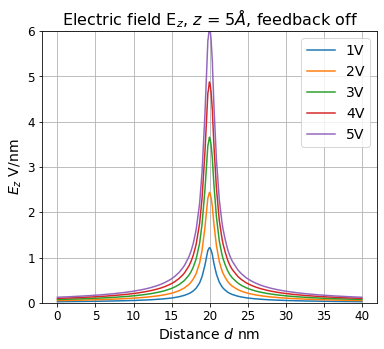

In [2]:
# feedback on
feedback_on_x, feedback_on_z = plot.generate_file_lists('COMSOL_data/feedback_on')
plot.plot_Ez(feedback_on_z, feedback='on', free_param=100)

#feedback off
feedback_off_x, feedback_off_z = plot.generate_file_lists('COMSOL_data/feedback_off')
plot.plot_Ez(feedback_off_z, feedback='off', free_param=5)

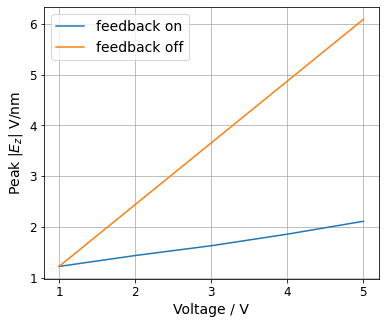

In [6]:
plot.plot_peakE(feedback_on_z, feedback_off_z, component='z')

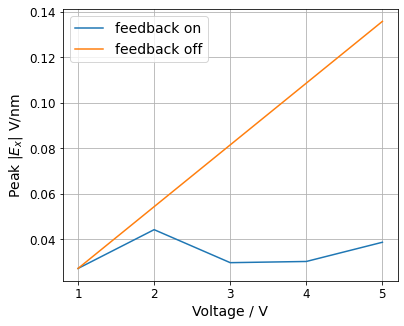

In [7]:
plot.plot_peakE(feedback_on_x, feedback_off_x, component='x')

In [4]:
#plot E_x data

colors = ['r','m','c']
i=0

plt.figure(figsize=(10, 6))

for file in x_files:
    df = pd.read_csv(file, delimiter='\t')
    voltage = file.split('/')[1].split('V')[0]

    df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
    df = df[7:]

    df['Distance'] = pd.to_numeric(df['Distance'])
    df['E_field'] = gaussian_filter(pd.to_numeric(df['E_field']), sigma=2)

    # Create the plot
    plt.plot(df['Distance'], df['E_field'], marker='', color=colors[i], linestyle='-', label=f'{voltage}V')
    
    i+=1

    # Add titles and labels
    plt.title('Electric field $E_{||}$, $I_s$ = ' + str(current) + 'pA')   
    plt.xlabel('Distance nm')
    plt.ylabel('$E_x$ V/nm')
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.xlim(10,40)

# plt.savefig('figures/E_x.png')

NameError: name 'x_files' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
#plot Ez, Ex on same axis:

def plotEzEx(x_files, z_files, set_voltage):
    """Plot Ex and Ez on same axis

    Args:
        x_files (_type_): _description_
        z_files (_type_): _description_
        set_voltage (_type_): _description_
    """
    
    setV = str(set_voltage)
    plt.figure(figsize=(10, 6))

    for file in x_files:
        df = pd.read_csv(file, delimiter='\t')
        voltage = file.split('/')[1].split('V')[0]
        
        if voltage == setV:
            df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
            df = df[7:]

            df['Distance'] = pd.to_numeric(df['Distance'])
            df['E_field'] = gaussian_filter(pd.to_numeric(df['E_field']).abs(), sigma=1)
            
            plt.plot(df['Distance'], df['E_field'], marker='', color='r', linestyle='--', label='$E_{||}$')
            

            # Add titles and labels
            plt.title('Electric field, $I_s$ = ' + str(current) + 'pA, voltage = ' + setV + 'V')   
            plt.xlabel('Distance nm')
            plt.ylabel('$E$ V/nm')
            
            # set xlim based on 'd'
            distance = np.max(df['Distance'])
            plt.xlim((distance/2), 45)

            plt.yscale('log')
        
    for file in z_files:
        df = pd.read_csv(file, delimiter='\t')
        voltage = file.split('/')[1].split('V')[0]
        
        if voltage == setV:
            df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
            df = df[7:]

            df['Distance'] = pd.to_numeric(df['Distance'])
            # df['E_field'] = pd.to_numeric(df['E_field']).abs()
            df['E_field'] = gaussian_filter(pd.to_numeric(df['E_field']).abs(), sigma=1)
            
            
            plt.plot(df['Distance'], df['E_field'], marker='', color='b', linestyle='--', label='$E_z$')
            
            plt.legend(fontsize=14)
            plt.grid(True)
        
        

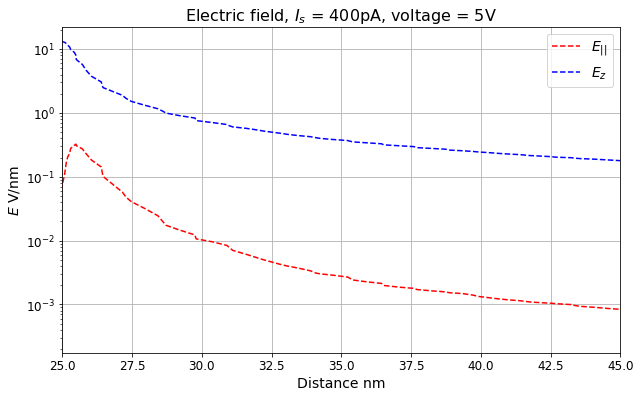

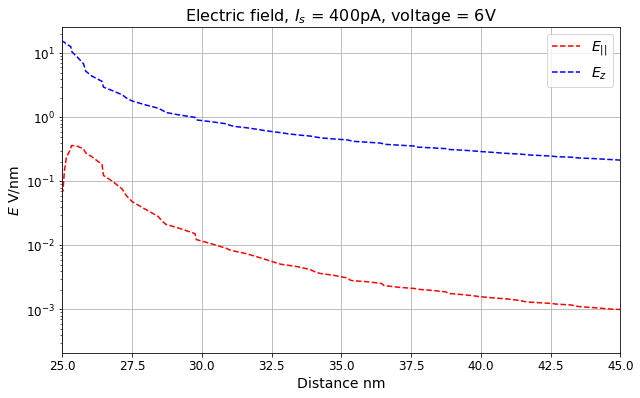

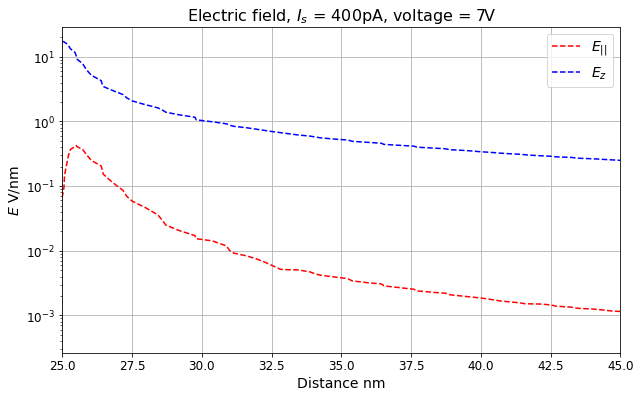

In [ ]:
voltages = [5,6,7]
for v in voltages:
    plotEzEx(x_files, z_files, v)